# Project 2

## Molecular Data

The QM7 dataset consists of 7165 organic molecules, each of which is composed of up to 23 atoms.


Analysis will include:
1. Visualization
2. Representation
3. Ridge Regression
4.
5.

In [86]:
%matplotlib inline
import scipy
from scipy import io # this import fixed the issue 
import numpy as np
import torch
import torchvision,torchvision.transforms
import sqlite3
import matplotlib
from matplotlib import pyplot as plt

data = scipy.io.loadmat('qm7.mat')

 The 3d coordinates of each atom in each molecule are available in the variable R. It is an array of size 7165×23×3
containing for each molecule and atom a triplet representing the 3d coordinates.

In [87]:
data['R'][0,0,:] # eg coordinates of first atom in first molecule

array([ 1.886438  , -0.00464873, -0.00823921], dtype=float32)

The variable Z is an array
of size 7165×23 which gives for each molecule and atom of the molecule the corresponding atomic number.
An atomic number of 1 corresponds to a hydrogen atom (H), the number 6 corresponds to carbon (C), the
numbers 7 and 8 to nitrogen (N) and oxygen (O) respectively, and finally, the number 16 corresponds to
sulfur (S). If the number is zero, then it indicates that there is no atom at this index, and the corresponding
3d coordinate should therefore be ignored.

In [88]:
data['Z'][0,0] # first atom of first molecule is carbon

6.0

 This allows for representing in the same array molecules of
different sizes. In addition to these geometrical features of the molecule, the dataset also provides for
each molecule its atomization energy (computed via quantum-chemical simulation). These atomization
energy values are stored in the variable T, an array of size 7165.

In [89]:
data['T'][0] # atomization energy values of first molecule

array([ -417.96,  -712.42,  -564.21, ..., -1662.1 , -1782.01, -1919.  ],
      dtype=float32)

We want to be able to visualize the molecules. For this we are utilizing 3D plotting in Matplotlib.

In [90]:
cov_radii = { # atomic nr to covalent radius
    1.:0.31,
    6.:0.772,
    7.:0.71,
    8.:0.66,
    16.:0.105,
}

# helper function
def bond(i, j, coords, ans) -> bool:
    """
    Returns True if and only if the atoms should bond given their atomic numbers and coordinates.
    """
    # if the distance between two atoms is less than the sum
    # of their covalent radii they are considered bonded
    r = cov_radii[ans[i]] + cov_radii[ans[j]]
    dist = coords[i] - coords[j]
    return  np.dot(dist, dist) < r*r #dist^2 < r^2

# visualization
def visualize(fig, molecule_index):
    """
    Creates an image of the molecule at a give index on the given Figure object.
    """

    ax = fig.add_subplot(projection='3d')

    atoms_present = data['Z'][molecule_index] != 0
    coords = data['R'][molecule_index][atoms_present] # atom coordinates
    ans = data['Z'][molecule_index][atoms_present] # atomic nrs

    # draw atoms
    for (name, nr, m) in [("H", 1, 'o'), ("C", 6, 's'), ("N", 7, 'd'), ("O", 8, '*'), ("S", 16, "^")]:
        elem = coords[ans==nr]
        ax.scatter(elem[:,0], elem[:,1], elem[:,2], s=50, marker=m, label=name)

    # draw lines between atoms that are close enough
    for i in range(len(coords)): # compare all combinations of atoms
        for j in range(i+1, len(coords)):
            if(bond(i, j, coords, ans)):
                # connect with a line
                ax.plot([coords[i][0], coords[j][0]],
                        [coords[i][1], coords[j][1]],
                        zs=[coords[i][2], coords[j][2]]
                        )

    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    ax.legend()

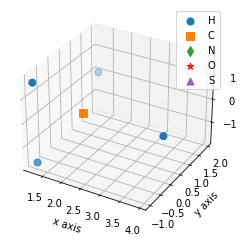

In [91]:
# Example usage of visualize.
fig = plt.figure()
visualize(fig, 0)
plt.show()